# Thera Bank Personal Loan CampaignData Description:

The dataset contains  data  on  5000  customers.  The  data  include  customer  demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account,  etc.),  and the  customer  response to  the  last  personal  loan  campaign  (Personal  Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

### Context:

This case is about a bank (TheraBank) whose management wants to explore ways of converting its  liability  customers  to  personal  loan  customers  (while  retaining  them  as  depositors).  A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over  9% success.  This  has  encouraged  the  retail  marketing  department  to  devise  campaigns with better target marketing to increase the success ratio with a minimal budget.

### Attribute Information:
    ID: CustomerID
    Age: Customer's age in completedyears
    Experience: #years of professionalexperience
    Income: Annual income of the customer($000)
    ZIP Code: Home Address ZIPcode.
    Family: Family size of thecustomer
    CCAvg: Avg. spending on credit cards per month($000)
    Education: Education Level. 1: Undergrad; 2: Graduate;3:  Advanced/Professional
    Mortgage: Value of house mortgage if any.($000)
    PersonalLoan: Did this customer accept the personal loan offered in the lastcampaign
    SecuritiesAccount: Does the customer have a securities account with the bank
    CDAccount: Does the customer have a certificate of deposit (CD) account with thebank?
    Online:  Does the customer use internet banking facilities?
    Creditcard: Does the customer use a creditcard issued by the bank?


### Objective:
    The classification goal is to predict the likelihood of a liability customer buying personal loans.

### Task1: 
Import the datasets and libraries, check datatype, statistical summary,shape,null values or incorrect imputation

In [1]:
#Importing the required libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,auc
from sklearn.metrics import roc_curve

In [2]:
#Reading the bank dataset
bank=pd.read_csv('Bank_Personal_Loan_Modelling.csv')
bank

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [3]:
# Checking for count of rows where Personal Loan is 1
bank[bank['Personal Loan']==1].shape

(480, 14)

#### Observation: The dataset has 5000 rows and 14 columns

In [4]:
print('*******************Bank Info************************')
print(bank.info())
print('*******************Bank Shape***********************')
print(bank.shape)
print('*******************Number of nulls*********************')
print(bank.isnull().sum())
print('*******************************************************')

*******************Bank Info************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None
*******************Bank Shape***********************
(5000, 14)
*******************Number of nulls*********************
ID                    0
Age                   0
Experience            0


Observation: 
    1. The dataset has 5000 rows and 14 columns of information.
    2. It has no Nulls in any of the columns
    3. Numeric Variables: ID, Age , Experience, Income, ZIP Code 
    4. Categoricals Variables: Family, Education
    5. Boolean variables: Personal Loan, Securities Account, CDAccount, Online, CreditCard

In [5]:
bank.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


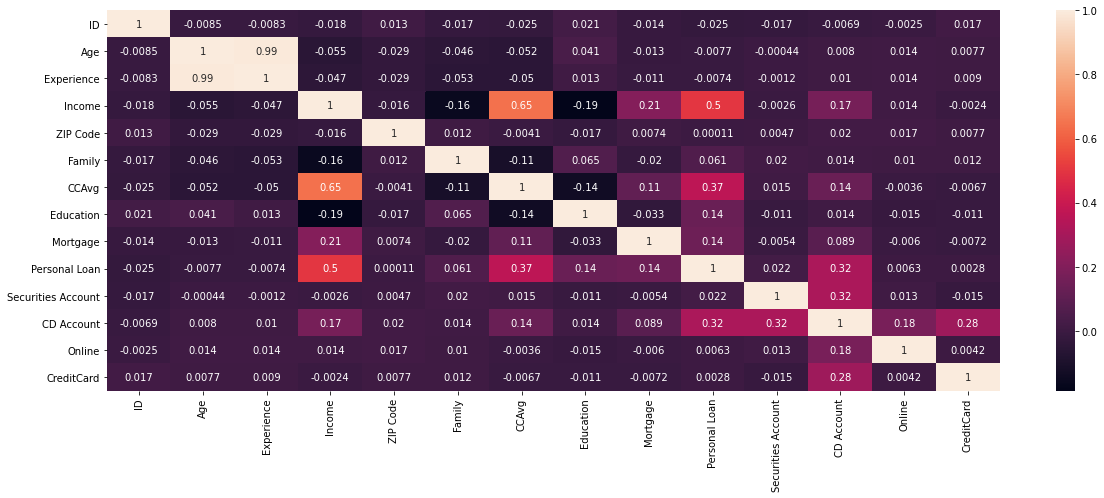

In [6]:
# Getting Correlation
plt.figure(figsize=(20,7))
sns.heatmap(bank.corr(),annot=True)

Observation: Age and Experience are highly correlated, Income and CCAvg are also highly correlated
    Personal loan is also positively and better correlated with CD Account, CC Avg and Income

In [7]:
# Statistical Summary
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


Observation:
    1. Columns 'Experience' col is showing Negative values
    2. There are large values/outliers in Income, CCAvg and Mortgage, are positively Skewed
    3. Education, Personal Loan, Securities Account, CD Account, Online and Credit Card are categorical features
    4. ID is an index and Zip Code are the locations and should be dropped.  

### Task 2: EDA

In [8]:
# Task 1: No of unique values in each column of the dataframe.
bank.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [9]:
# Task 2: Number of people with zero mortgage
print('No of People with Zero Mortgage:',len(bank[bank['Mortgage']==0]))
# Task 3: No of people with Zero CC spending per month
print('No of People with Zero CC Spending:',len(bank[bank['CCAvg']==0]))

No of People with Zero Mortgage: 3462
No of People with Zero CC Spending: 106


In [10]:
# Task 4: Value counts of all categorical columns
print('*******************Family Value Counts************************')
print(bank['Family'].value_counts())
print('*******************Education Value Counts************************')
print(bank['Education'].value_counts())
print('*******************Personal Loan Value Counts************************')
print(bank['Personal Loan'].value_counts())
print('*******************Securities Account Value Counts************************')
print(bank['Securities Account'].value_counts())
print('*******************CD Account Value Counts************************')
print(bank['CD Account'].value_counts())
print('*******************Online Value Counts************************')
print(bank['Online'].value_counts())
print('*******************Credit Card Value Counts************************')
print(bank['CreditCard'].value_counts())

*******************Family Value Counts************************
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
*******************Education Value Counts************************
1    2096
3    1501
2    1403
Name: Education, dtype: int64
*******************Personal Loan Value Counts************************
0    4520
1     480
Name: Personal Loan, dtype: int64
*******************Securities Account Value Counts************************
0    4478
1     522
Name: Securities Account, dtype: int64
*******************CD Account Value Counts************************
0    4698
1     302
Name: CD Account, dtype: int64
*******************Online Value Counts************************
1    2984
0    2016
Name: Online, dtype: int64
*******************Credit Card Value Counts************************
0    3530
1    1470
Name: CreditCard, dtype: int64


#### Getting Data Model Ready

In [11]:
# Dropping ID and Zip Code
bank.drop(columns = {'ID','ZIP Code'},axis=1,inplace=True)

In [12]:
# Changing Experience shown for below zero as zero
bank.loc[(bank['Experience']<0),'Experience']=0
bank[bank['Experience']>0]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


In [13]:
bank[bank['Experience']==0]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25,0,113,4,2.30,3,0,0,0,0,0,1
105,24,0,35,3,0.10,2,0,0,1,0,1,0
151,26,0,132,3,6.50,3,0,1,0,0,0,1
155,24,0,60,4,1.60,1,0,0,0,0,1,0
156,26,0,15,4,0.40,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4901,26,0,54,3,1.10,2,0,0,0,0,1,0
4934,26,0,85,2,1.60,3,0,0,0,0,1,1
4943,26,0,12,1,0.10,2,0,0,0,0,1,0
4957,29,0,50,2,1.75,3,0,0,0,0,0,1


### Task 5: Univariate & Bi-variate Analysis

#### Univariate Analysis

In [14]:
for i in bank.columns:
    print('Skewness of Column >>',i,'<< is -->', bank[i].skew())

Skewness of Column >> Age << is --> -0.02934068151284029
Skewness of Column >> Experience << is --> -0.017220705364694253
Skewness of Column >> Income << is --> 0.8413386072610816
Skewness of Column >> Family << is --> 0.15522066944367582
Skewness of Column >> CCAvg << is --> 1.5984433366678663
Skewness of Column >> Education << is --> 0.22709331566088503
Skewness of Column >> Mortgage << is --> 2.1040023191079444
Skewness of Column >> Personal Loan << is --> 2.743606655894059
Skewness of Column >> Securities Account << is --> 2.588268372959341
Skewness of Column >> CD Account << is --> 3.6917137984151887
Skewness of Column >> Online << is --> -0.3947853269234487
Skewness of Column >> CreditCard << is --> 0.9045894514231758


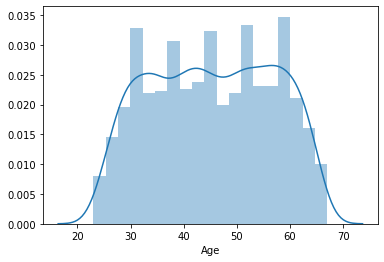

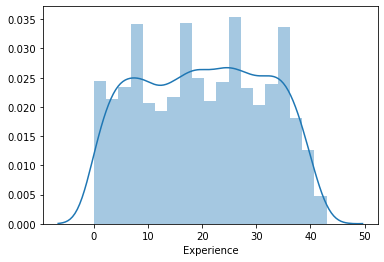

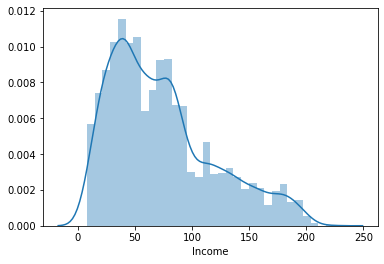

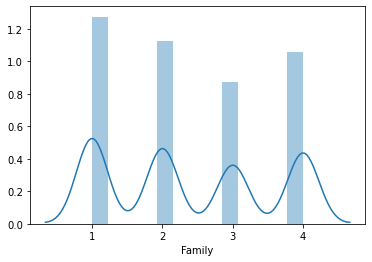

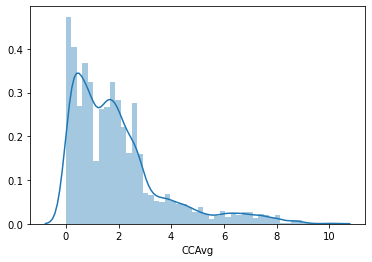

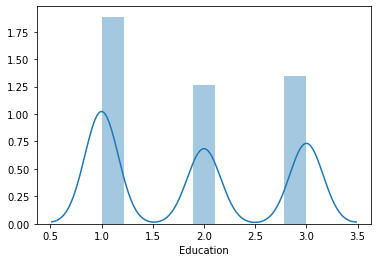

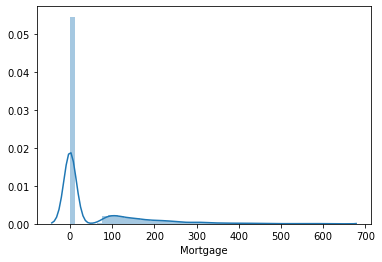

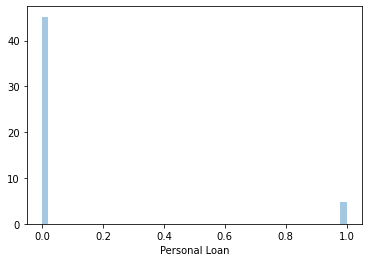

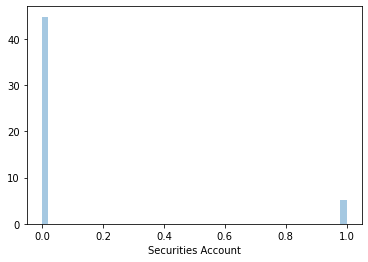

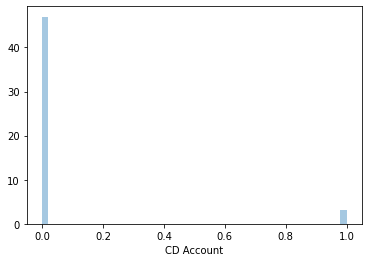

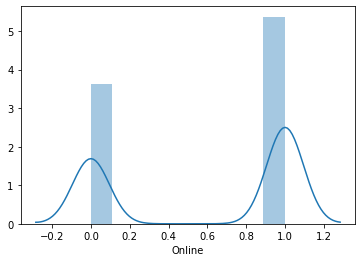

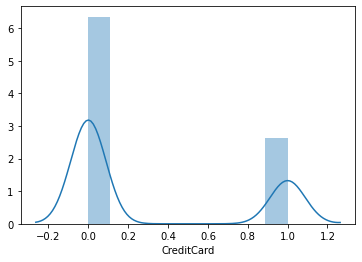

In [15]:
# distplot for continous columns
for i in bank.columns:
    sns.distplot(bank[i])
    plt.show()

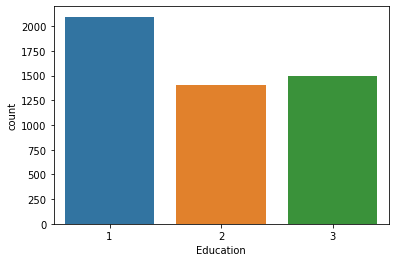

In [16]:
sns.countplot(bank['Education'])

In [17]:
# bank['Income'].value_counts(normalize=True)

In [18]:
# bank['CCAvg'].value_counts(normalize=True)

In [19]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.119600,11.440484,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


Observations:
1. Mean Age value is 45 with standard deviation of 11.46, the curve is slightly negatively skewed
2. Mean Experience is 20.119(in 000) with Std Dev of 11.44, the curve is slightly negatively skewed
3. Mean Income is 73.77 (in 000) with Std Dev of 46.03, the curve is positively skewed. There are outliers present in this feature. Large values are present.
4. Mean of Family size is around 2 with Std Dev of 1, skewness is positive and there are more no of people with Family Size of 1
5. Mean of CC Avg is around 1.93(in 000) with Std Dev of 1.74, the curve is positively skewed. There are outliers present in this feature. Large values are present.
6. There are more Under Graduates in the Education feature, Mean value is 1.88 with Std Dev of .84, curve is positively skewed.
7. Mean Mortgage Value is 56.5 with Std Dev of 101.71. there are outliers in this feature. Large values are present. There are more people in the set with no mortgage.
8. There are more people with No Personal Loan, No Securities Acc, No CD Account and with No Credit card.
9. There are more people with Online Accounts in the dataset.

### Bi-Variate Analysis & Plots between all columns and Personal Loan

In [20]:
# Binning for age

bin_edges = [0, 10, 20,30,40, 50, 60, 70, 80]         # edges to define intervals
bin_labels = ['0-10', '10-20', '20-30','30-40','40-50','50-60','60-70','70-80']   # labels to denote each interval
bank['Age'] = pd.cut(bank['Age'], bins=bin_edges , labels=bin_labels)
bank

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,20-30,1,49,4,1.6,1,0,0,1,0,0,0
1,40-50,19,34,3,1.5,1,0,0,1,0,0,0
2,30-40,15,11,1,1.0,1,0,0,0,0,0,0
3,30-40,9,100,1,2.7,2,0,0,0,0,0,0
4,30-40,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,20-30,3,40,1,1.9,3,0,0,0,0,1,0
4996,20-30,4,15,4,0.4,1,85,0,0,0,1,0
4997,60-70,39,24,2,0.3,3,0,0,0,0,0,0
4998,60-70,40,49,3,0.5,2,0,0,0,0,1,0


Personal Loan     0    1
Age                     
20-30           558   66
30-40          1118  118
40-50          1148  122
50-60          1208  115
60-70           488   59
Personal Loan         0         1
Age                              
20-30          0.894231  0.105769
30-40          0.904531  0.095469
40-50          0.903937  0.096063
50-60          0.913076  0.086924
60-70          0.892139  0.107861


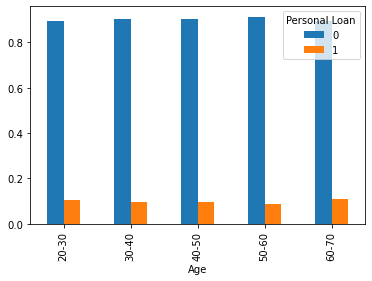

In [21]:
A_PL=pd.crosstab(bank['Age'],bank['Personal Loan'],normalize='index')
print(pd.crosstab(bank['Age'],bank['Personal Loan']))
print(A_PL.head())
A_PL.plot(kind='bar')

#### Observation:
    Personal Loan is taken more by Young and Old people.

In [22]:
# Binning for Experience

bin_edges1 = [0,5,10,15,20,25,30,35,40,45,50]
bin_labels1 = ['0-5','5-10','10-15','15-20','20-25','25-30','30-35','35-40','40-45','45-50']
bank['Experience'] = pd.cut(bank['Experience'], bins=bin_edges1 , labels=bin_labels1)
bank

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,20-30,0-5,49,4,1.6,1,0,0,1,0,0,0
1,40-50,15-20,34,3,1.5,1,0,0,1,0,0,0
2,30-40,10-15,11,1,1.0,1,0,0,0,0,0,0
3,30-40,5-10,100,1,2.7,2,0,0,0,0,0,0
4,30-40,5-10,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,20-30,0-5,40,1,1.9,3,0,0,0,0,1,0
4996,20-30,0-5,15,4,0.4,1,85,0,0,0,1,0
4997,60-70,35-40,24,2,0.3,3,0,0,0,0,0,0
4998,60-70,35-40,49,3,0.5,2,0,0,0,0,1,0


Personal Loan         0         1
Experience                       
0-5            0.895795  0.104205
5-10           0.889423  0.110577
10-15          0.912220  0.087780
15-20          0.900298  0.099702
20-25          0.909786  0.090214
25-30          0.907264  0.092736
30-35          0.912908  0.087092
35-40          0.897826  0.102174
40-45          0.870370  0.129630


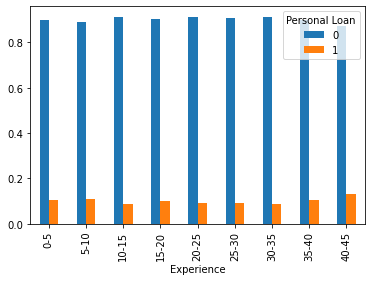

In [23]:
E_PL=pd.crosstab(bank['Experience'],bank['Personal Loan'],normalize='index')
print(E_PL.head(10))
E_PL.plot(kind='bar')

#### Observation:
    Personal Loan is taken more by lower experience people of 0-10 years or high experience people of 35-45 years. 

In [24]:
# Binning for Income
bin_edges2 = [0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250]
bin_labels2 = ['0-25', '25-50', '50-75', '75-100', '100-125', '125-150', '150-175', '175-200', '200-225', '225-250']
bank['Income'] = pd.cut(bank['Income'], bins=bin_edges2 , labels=bin_labels2)

Personal Loan     0    1
Income                  
0-25            672    0
25-50          1242    0
50-75          1037    7
75-100          795   35
100-125         339  102
125-150         211  118
150-175         130  117
175-200          81   98
200-225          13    3
Personal Loan         0         1
Income                           
0-25           1.000000  0.000000
25-50          1.000000  0.000000
50-75          0.993295  0.006705
75-100         0.957831  0.042169
100-125        0.768707  0.231293
125-150        0.641337  0.358663
150-175        0.526316  0.473684
175-200        0.452514  0.547486
200-225        0.812500  0.187500
(9, 2)


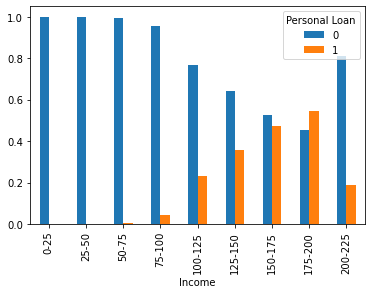

In [25]:
I_PL=pd.crosstab(bank['Income'],bank['Personal Loan'],normalize='index')
print(pd.crosstab(bank['Income'],bank['Personal Loan']))
print(I_PL.head(10))
print(I_PL.shape)
I_PL.plot(kind='bar')

#### Observation:
    Popularity of personal Loan increases with Income group of 100 and UP, but decreases with 
    Income group of 200-225
    Personal Loan hasnot gained traction with Income Group of 0-100(very few cases)    

Personal Loan         0         1
Family                           
1              0.927310  0.072690
2              0.918210  0.081790
3              0.868317  0.131683
4              0.890344  0.109656
(4, 2)


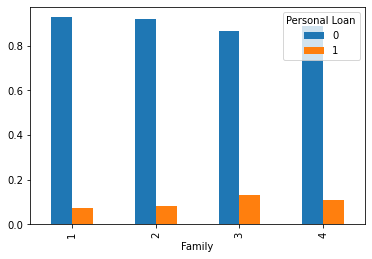

In [26]:
# For Family
F_PL=pd.crosstab(bank['Family'],bank['Personal Loan'],normalize='index')
print(F_PL.head(10))
print(F_PL.shape)
F_PL.plot(kind='bar')

#### Observation:
    Personal Loan is most popular with Family Size of 3 and then with Family Size of 4

In [27]:
# Binning for CCAvg
bin_edges3 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
bin_labels3 = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10']
bank['CCAvg'] = pd.cut(bank['CCAvg'], bins=bin_edges3 , labels=bin_labels3)
bank

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,20-30,0-5,25-50,4,1-2,1,0,0,1,0,0,0
1,40-50,15-20,25-50,3,1-2,1,0,0,1,0,0,0
2,30-40,10-15,0-25,1,0-1,1,0,0,0,0,0,0
3,30-40,5-10,75-100,1,2-3,2,0,0,0,0,0,0
4,30-40,5-10,25-50,4,0-1,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,20-30,0-5,25-50,1,1-2,3,0,0,0,0,1,0
4996,20-30,0-5,0-25,4,0-1,1,85,0,0,0,1,0
4997,60-70,35-40,0-25,2,0-1,3,0,0,0,0,0,0
4998,60-70,35-40,25-50,3,0-1,2,0,0,0,0,1,0


Personal Loan         0         1
CCAvg                            
0-1            0.973451  0.026549
1-2            0.964741  0.035259
2-3            0.921460  0.078540
3-4            0.692308  0.307692
4-5            0.593137  0.406863
5-6            0.409524  0.590476
6-7            0.641667  0.358333
7-8            0.768293  0.231707
8-9            0.714286  0.285714
9-10           0.000000  1.000000
(10, 2)


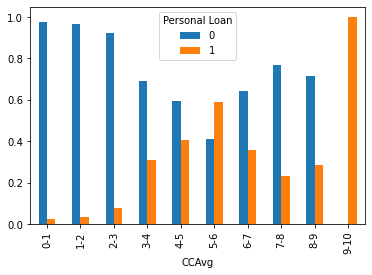

In [28]:
# For CCAvg
#bank['CCAvg'].describe()
CC_PL=pd.crosstab(bank['CCAvg'],bank['Personal Loan'],normalize='index')
print(CC_PL.head(10))
print(CC_PL.shape)
CC_PL.plot(kind='bar')

#### Observation:
Personal Loan is popular among people with Higher Credit Usage between 2000 to 9000. Being highest in 5000-6000 set.
People with very High Credit usage of 9000-10000 have all opted for Personal Loan.

In [29]:
bank[bank['CCAvg']=='9-10']

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
787,40-50,10-15,200-225,3,9-10,3,0,1,0,0,0,0
2101,30-40,0-5,200-225,1,9-10,3,0,1,0,0,0,0
2337,40-50,15-20,200-225,1,9-10,2,0,1,0,0,0,1
3943,60-70,35-40,175-200,1,9-10,2,0,1,0,0,0,0


Personal Loan     0    1
Education               
1              2003   93
2              1221  182
3              1296  205
Personal Loan         0         1
Education                        
1              0.955630  0.044370
2              0.870278  0.129722
3              0.863424  0.136576
(3, 2)


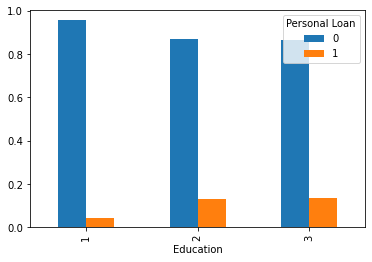

In [30]:
# For Education:
E_PL=pd.crosstab(bank['Education'],bank['Personal Loan'],normalize='index')
print(pd.crosstab(bank['Education'],bank['Personal Loan']))
print(E_PL.head(10))
print(E_PL.shape)
E_PL.plot(kind='bar')

#### Observation:
    More Educated people are taking more personal Loans

In [31]:
# Bi_variate Analysis For Feature Mortgage
bank['Mortgage'].describe()

count    5000.000000
mean       56.498800
std       101.713802
min         0.000000
25%         0.000000
50%         0.000000
75%       101.000000
max       635.000000
Name: Mortgage, dtype: float64

In [32]:
bank['Mortgage'].median()

0.0

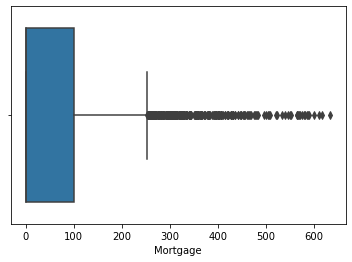

In [33]:
sns.boxplot(x=bank['Mortgage'])

In [34]:
# Method 1: By replacing Large right side outliers with the value of Q3 + 1.5&*IQR, was leading to lower precision 
# and Recall values, thats why commented and used binning

#Q1=bank['Mortgage'].quantile(.25)
#Q3=bank['Mortgage'].quantile(.75)
#IQR=Q3-Q1
#print(IQR)
#upper_whisker=Q3 + (1.5*IQR)
#print(upper_whisker)

In [35]:
# Calculating Z score on Mortgage
#z=np.abs(stats.zscore(bank['Mortgage']))
#print(z)
#threshold = 3
#arr=np.where(z >= threshold)
#len(arr[0])

In [36]:
#bank.iloc[arr[0],:]

In [37]:
#Replace every Mortgage outlier on the upper side by the upper whisker 
#bank.iloc[arr[0],6]=int(upper_whisker)
#bank.iloc[arr[0],:]

In [38]:
# Binning for Mortgage
bin_edges5 = [0, 100, 200, 300, 400, 500, 600, 700]

bin_labels5 = ['0-100', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700']

bank['Mortgage'] = pd.cut(bank['Mortgage'], bins=bin_edges5 , labels=bin_labels5)
# pd.cut was not binning where Mortgage was 0, hence filling them up with fillna
bank.Mortgage = bank.Mortgage.fillna('0-100')
bank

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,20-30,0-5,25-50,4,1-2,1,0-100,0,1,0,0,0
1,40-50,15-20,25-50,3,1-2,1,0-100,0,1,0,0,0
2,30-40,10-15,0-25,1,0-1,1,0-100,0,0,0,0,0
3,30-40,5-10,75-100,1,2-3,2,0-100,0,0,0,0,0
4,30-40,5-10,25-50,4,0-1,2,0-100,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,20-30,0-5,25-50,1,1-2,3,0-100,0,0,0,1,0
4996,20-30,0-5,0-25,4,0-1,1,0-100,0,0,0,1,0
4997,60-70,35-40,0-25,2,0-1,3,0-100,0,0,0,0,0
4998,60-70,35-40,25-50,3,0-1,2,0-100,0,0,0,1,0


Personal Loan         0         1
Mortgage                         
0-100          0.913194  0.086806
100-200        0.948549  0.051451
200-300        0.865320  0.134680
300-400        0.687500  0.312500
400-500        0.583333  0.416667
500-600        0.333333  0.666667
600-700        0.500000  0.500000
(7, 2)


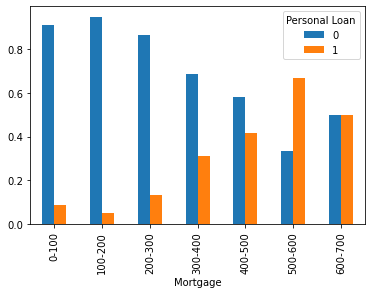

In [39]:
# For Mortgage: 
M_PL=pd.crosstab(bank['Mortgage'],bank['Personal Loan'],normalize='index')
print(M_PL.head(10))
print(M_PL.shape)
M_PL.plot(kind='bar')

#### Observation: Growing Mortgage leading to more Personal Loans

Personal Loan          0    1
Securities Account           
0                   4058  420
1                    462   60
Personal Loan              0         1
Securities Account                    
0                   0.906208  0.093792
1                   0.885057  0.114943
(2, 2)


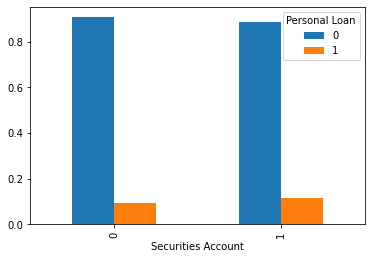

In [40]:
# For Securities Account
S_PL=pd.crosstab(bank['Securities Account'],bank['Personal Loan'],normalize='index')
print(pd.crosstab(bank['Securities Account'],bank['Personal Loan']))
print(S_PL.head(10))
print(S_PL.shape)
S_PL.plot(kind='bar')

#### Observation: Securities Account is not much influencing the buy of Personal Loan

Personal Loan     0    1
CD Account              
0              4358  340
1               162  140
Personal Loan         0         1
CD Account                       
0              0.927629  0.072371
1              0.536424  0.463576
(2, 2)


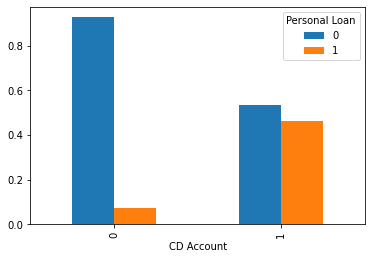

In [41]:
# For CD Account
CD_PL=pd.crosstab(bank['CD Account'],bank['Personal Loan'],normalize='index')
print(pd.crosstab(bank['CD Account'],bank['Personal Loan']))
print(CD_PL.head(10))
print(CD_PL.shape)
CD_PL.plot(kind='bar')

#### Observation: The people with CD account opted more for Personal Loan.

Personal Loan     0    1
Online                  
0              1827  189
1              2693  291
Personal Loan        0        1
Online                         
0              0.90625  0.09375
1              0.90248  0.09752
(2, 2)


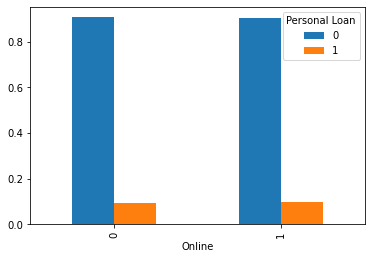

In [42]:
# For Online Account
O_PL=pd.crosstab(bank['Online'],bank['Personal Loan'],normalize='index')
print(pd.crosstab(bank['Online'],bank['Personal Loan']))
print(O_PL.head(10))
print(O_PL.shape)
O_PL.plot(kind='bar')

#### Observation: Online account hasn't lead people to buy the Personal Loan.

Personal Loan     0    1
CreditCard              
0              3193  337
1              1327  143
Personal Loan         0         1
CreditCard                       
0              0.904533  0.095467
1              0.902721  0.097279
(2, 2)


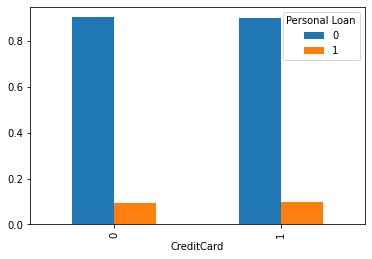

In [43]:
# For CreditCard Account
Cr_PL=pd.crosstab(bank['CreditCard'],bank['Personal Loan'],normalize='index')
print(pd.crosstab(bank['CreditCard'],bank['Personal Loan']))
print(Cr_PL.head(10))
print(Cr_PL.shape)
Cr_PL.plot(kind='bar')

#### Observation: Credit Card account hasn't lead people to buy the Personal Loan.

### EDA SubTask 6: Getting Data Model Ready

In [44]:
# Taking a look at Dataset
bank

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,20-30,0-5,25-50,4,1-2,1,0-100,0,1,0,0,0
1,40-50,15-20,25-50,3,1-2,1,0-100,0,1,0,0,0
2,30-40,10-15,0-25,1,0-1,1,0-100,0,0,0,0,0
3,30-40,5-10,75-100,1,2-3,2,0-100,0,0,0,0,0
4,30-40,5-10,25-50,4,0-1,2,0-100,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,20-30,0-5,25-50,1,1-2,3,0-100,0,0,0,1,0
4996,20-30,0-5,0-25,4,0-1,1,0-100,0,0,0,1,0
4997,60-70,35-40,0-25,2,0-1,3,0-100,0,0,0,0,0
4998,60-70,35-40,25-50,3,0-1,2,0-100,0,0,0,1,0


In [45]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
Age                   5000 non-null category
Experience            4882 non-null category
Income                5000 non-null category
Family                5000 non-null int64
CCAvg                 4894 non-null category
Education             5000 non-null int64
Mortgage              5000 non-null category
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: category(5), int64(7)
memory usage: 299.9 KB


In [46]:
#Convert X & Y variable to a categorical variable wherever relevant
bank['CreditCard'] = bank['CreditCard'].astype('category')
bank['Online'] = bank['Online'].astype('category')
bank['CD Account'] = bank['CD Account'].astype('category')
bank['Securities Account'] = bank['Securities Account'].astype('category')
bank['Personal Loan'] = bank['Personal Loan'].astype('category')
bank['Family'] = bank['Family'].astype('category')
# Replacing Number codes with actual Meaning in Education Column
bank['Education']=bank['Education'].replace({1:'UGrad',2:'Grad',3:'AdvProf'})
bank['Education'] = bank['Education'].astype('category')
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
Age                   5000 non-null category
Experience            4882 non-null category
Income                5000 non-null category
Family                5000 non-null category
CCAvg                 4894 non-null category
Education             5000 non-null category
Mortgage              5000 non-null category
Personal Loan         5000 non-null category
Securities Account    5000 non-null category
CD Account            5000 non-null category
Online                5000 non-null category
CreditCard            5000 non-null category
dtypes: category(12)
memory usage: 61.4 KB


In [47]:
## Define X and Y variables

X = bank.drop('Personal Loan', axis=1)
Y = bank['Personal Loan'].astype('category') 

In [48]:
#Convert categorical vriables to dummy variables
X = pd.get_dummies(X, drop_first=True)
X

,Age_10-20,Age_20-30,Age_30-40,Age_40-50,Age_50-60,Age_60-70,Age_70-80,Experience_5-10,Experience_10-15,Experience_15-20,...,Mortgage_100-200,Mortgage_200-300,Mortgage_300-400,Mortgage_400-500,Mortgage_500-600,Mortgage_600-700,Securities Account_1,CD Account_1,Online_1,CreditCard_1
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4996,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4997,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [49]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 49 columns):
Age_10-20               5000 non-null uint8
Age_20-30               5000 non-null uint8
Age_30-40               5000 non-null uint8
Age_40-50               5000 non-null uint8
Age_50-60               5000 non-null uint8
Age_60-70               5000 non-null uint8
Age_70-80               5000 non-null uint8
Experience_5-10         5000 non-null uint8
Experience_10-15        5000 non-null uint8
Experience_15-20        5000 non-null uint8
Experience_20-25        5000 non-null uint8
Experience_25-30        5000 non-null uint8
Experience_30-35        5000 non-null uint8
Experience_35-40        5000 non-null uint8
Experience_40-45        5000 non-null uint8
Experience_45-50        5000 non-null uint8
Income_25-50            5000 non-null uint8
Income_50-75            5000 non-null uint8
Income_75-100           5000 non-null uint8
Income_100-125          5000 non-null uint8
Income_125-15

## Task 3: Split the data into training and test set in the ratio of 70:30 respectively

In [50]:
##Split into training and test set

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=7)

In [51]:
#tmp=pd.DataFrame(y_train)
#tmp[tmp['Personal Loan']==1].shape

In [52]:
#tmp1=pd.DataFrame(y_test)
#print(tmp1.shape)
#print(tmp1[tmp1['Personal Loan']==1].shape)

In [53]:
#X_test.shape

In [54]:
## Task 4: Using Logistic Regression

In [55]:
# Creating Model and fitting it on train data
logreg = LogisticRegression(random_state=7)
logreg.fit(X_train, y_train) 

LogisticRegression(random_state=7)

In [56]:
# Predicting the target variable on test data
y_predict = logreg.predict(X_test) 

In [57]:
#tmp2=pd.DataFrame(y_predict)
#tmp2
#tmp2[tmp2[0]==0].shape

In [58]:
# Observe the predicted and observed classes in a dataframe.

a = X_test.copy()
a['Observed PLoan Status'] = y_test
a['Predicted PLoan Status'] = y_predict
a.head(20)

,Age_10-20,Age_20-30,Age_30-40,Age_40-50,Age_50-60,Age_60-70,Age_70-80,Experience_5-10,Experience_10-15,Experience_15-20,...,Mortgage_300-400,Mortgage_400-500,Mortgage_500-600,Mortgage_600-700,Securities Account_1,CD Account_1,Online_1,CreditCard_1,Observed PLoan Status,Predicted PLoan Status
3406,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
757,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3624,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4544,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3235,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1868,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2916,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3335,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3527,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2827,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0


In [59]:
## function to get confusion matrix
def draw_cm(actual,predicted):
    cm = confusion_matrix(actual,predicted)
    sns.heatmap(cm,annot=True,fmt='.2f',xticklabels = [0,1] ,yticklabels = [0,1])
    plt.ylabel('Observed PL Value')
    plt.xlabel('Predicted PL Value')
    plt.show()

Trainig accuracy--> 0.9688571428571429

Testing accuracy--> 0.966

Confusion Matrix:


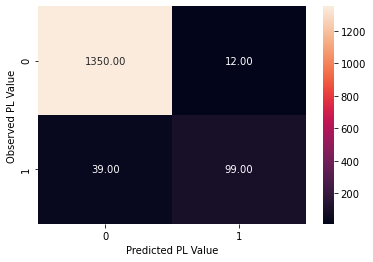

None

Recall Value--> 0.717391304347826

Precision Value--> 0.8918918918918919

F1 Score--> 0.7951807228915664

Roc Auc Score--> 0.8542903658303008


In [60]:
## Printing All releavnt metrics Accuracy, Recall, Precision, f1 score, and roc_auc_score
## Drawing a Heat Map as Confusion Matrix

print("Trainig accuracy-->",logreg.score(X_train,y_train))  
print('')
print("Testing accuracy-->",logreg.score(X_test, y_test))
print('')
print('Confusion Matrix:')
print(draw_cm(y_test,y_predict))
print('')
print("Recall Value-->",recall_score(y_test,y_predict))
print('')
print("Precision Value-->",precision_score(y_test,y_predict))
print('')
print("F1 Score-->",f1_score(y_test,y_predict))
print('')
print("Roc Auc Score-->",roc_auc_score(y_test,y_predict))

In [61]:
#print("Classification Report--")
#print(classification_report(y_test,y_predict))

ROC AUC Score--> 0.8542903658303008


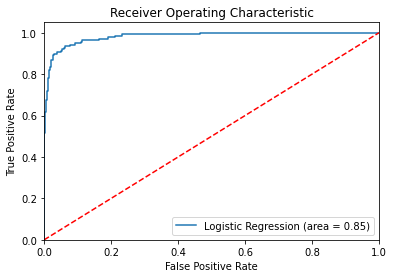

In [62]:
#Printing AUC ROC curve

roc_auc_scr = roc_auc_score(y_test, y_predict)
print("ROC AUC Score-->",roc_auc_scr)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
#print("Area Under Curve-->",auc(fpr,tpr))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc_scr)
#plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % auc(fpr,tpr))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [63]:
## Coefficients of all the attributes with Name and Values as separate column
Coeff_Col_df = pd.DataFrame()
Coeff_Col_df['Col'] = X_train.columns
Coeff_Col_df['Coeff'] = np.round(abs(logreg.coef_[0]),2)
print("Shape of Coeff DF-->",Coeff_Col_df.shape)
print('')
print("Coefficients of all the attributes with Name and Values:")
Coeff_Col_df.sort_values(by='Coeff',ascending=False)

Shape of Coeff DF--> (49, 2)

Coefficients of all the attributes with Name and Values:


,Col,Coeff
22,Income_175-200,4.30
21,Income_150-175,4.17
20,Income_125-150,4.06
38,Education_UGrad,3.06
46,CD Account_1,2.83
19,Income_100-125,2.55
16,Income_25-50,2.54
30,CCAvg_3-4,2.15
36,CCAvg_9-10,1.76
31,CCAvg_4-5,1.64


In [64]:
## Show all the rows where the predicted class is not equal to the observer class
a[a['Predicted PLoan Status']!=a['Observed PLoan Status']]

,Age_10-20,Age_20-30,Age_30-40,Age_40-50,Age_50-60,Age_60-70,Age_70-80,Experience_5-10,Experience_10-15,Experience_15-20,...,Mortgage_300-400,Mortgage_400-500,Mortgage_500-600,Mortgage_600-700,Securities Account_1,CD Account_1,Online_1,CreditCard_1,Observed PLoan Status,Predicted PLoan Status
4575,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1731,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
4154,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
473,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2996,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,1,1,1,1,0
3983,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1793,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3612,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,1,0,1,1,0
2857,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
737,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


### Task 6 Business Understanding of the Model


#### Confusion Matrix Means:
    
    True Positive (Observed=1,Predicted=1): Total Count:99
        Predicted the potential Personal loan customer and the customer had already accepted/granted the Personal Loan

    False Positive (Observed=0,Predicted=1): Total Count: 12
        Predicted the potential Personal loan customer, the customer didn't accept/not-eligibile for the loan

    True Negative (Observed=0,Predicted=0): Total Count: 1350
        Predicted that Personal loan will not be accepted/granted, and the customer didn't accept/not-eligibile for the loan

    False Negative (Observed=1,Predicted=0): Total Count: 39
        Predicted that Personal loan will not be accepted/granted, and the customer accepted or was eligibile for the loan

#### Important Metrics and Reasons:
    
    Here bank wants to devise campaigns with better target marketing to increase the success ratio with a minimal budget, so bank would really like to minimize number of False Positives to minimize the costs on marketing not converting to a Personal Loan customer, so "Precision" is the important metric.
    In Case of False Negatives, bank will loose some of the PL customers, but it should be ok because bank really wants to work on minimal budget.

#### Important Features:
    
    "Income_175-200, Income_150-175, Income_125-150, Education_UGrad, CD Account_1"
    Based on Coef. Values, the above features are the top 5 features influencing the model's output.

#### Least Important Features:
    "Income_225-250, Age_70-80, Experience_45-50, Age_10-20, Experience_5-10" are the least important features based on Coef. Values. These are the least influencers in model's output. 

#### Was the model able to provide a solution for the problem statement:

It looks like that the model achieved the accuracy of 96.6% and is able to provide the solution to the problem statement of identiftying probable PL customers, and hence can be used for upcoming customers.